# Exploring
TODO: Add txt

In [2]:
import os
import sys
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt

# Import module up a directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import rooflineModel as rfm

def select(df, parts, sort=None):
    ap = map(lambda x: df[x[0]] == x[1], parts)
    id = reduce(lambda x,y: x & y, ap)
    ret = df[id]
    if sort is not None:
            ret = ret.sort_values(by=sort)
    return ret

def helper(which=None, batch_frequency=None, train_frequency=None, batch_size=None, ranks=None, episode_block=None):
    ret = []
    if which is not None:
        ret.append(("which", which))
    if batch_frequency is not None:
        ret.append(("batch_frequency", batch_frequency))
    if train_frequency is not None:
        ret.append(("train_frequency", train_frequency))
    if batch_size is not None:
        ret.append(("batch_size", batch_size))
    if ranks is not None:
        ret.append(("ranks", ranks))
    if episode_block is not None:
        ret.append(("episode_block", episode_block))
    return ret


### Change results to the directory with benchmark output.

In [3]:
csvDir = "./csvs"
results = "../convergenceTest/cartpole_batch_all/"
data = rfm.getCartDataframe(results, csvDir=csvDir, force=False)

syncResults = "../convergenceTest/cartpole_sync/"
syncData = rfm.getCartDataframe(syncResults, csvDir=csvDir, force=False)
data = pd.concat([data, syncData])

data['batch_frequency'] = data['batch_frequency'].mask(data['batch_frequency'] == -1, 100)
which = data["which"].unique()
batchFrequency = data["batch_frequency"].unique()
trainFrequency = data["train_frequency"].unique()
batchSize = data["batch_size"].unique()
ranks = data["ranks"].unique()
episodeBlock = data["episode_block"].unique()

batchFrequency.sort()
trainFrequency.sort()
batchSize.sort()
ranks.sort()

print("which", which)
print("batch frequency", batchFrequency)
print("train frequency", trainFrequency)
print("batch size", batchSize)
print("ranks", ranks)
print("episode block", episodeBlock, episodeBlock.dtype)

Writing ./csvs/___convergenceTest_cartpole_batch_all_.csv
Reading ./csvs/___convergenceTest_cartpole_sync_.csv
which ['async' 'sync']
batch frequency [  1   2   5  10  50 100]
train frequency [  1   2   5  10 100]
batch size [ 32  73 128 256 512]
ranks [ 1  2  5  9 17 24]
episode block [False  True] bool


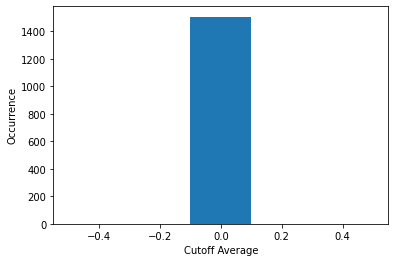

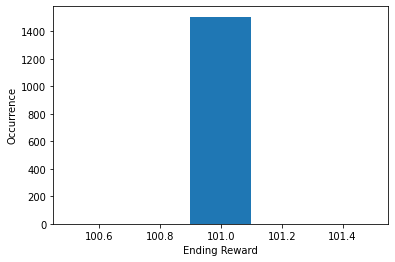

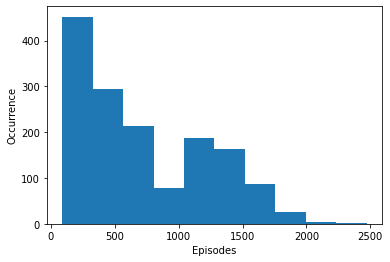

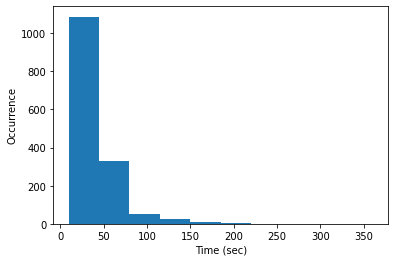

In [4]:
cols = ["average", "last", "converged", "time"]
labels = ["Cutoff Average", "Ending Reward", "Episodes", "Time (sec)"]
bins = [5, 5, 10, 10]
for col, label, bin in zip(cols, labels, bins): 
    plt.hist(data[col], align="mid", bins=bin)
    plt.xlabel(label)
    plt.ylabel("Occurrence")
    plt.show()

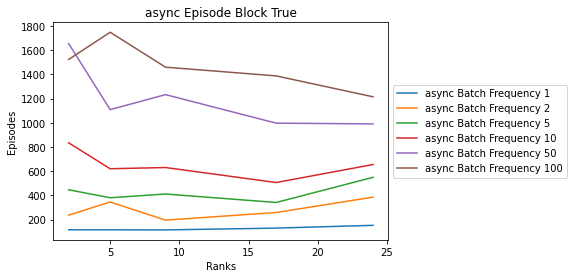

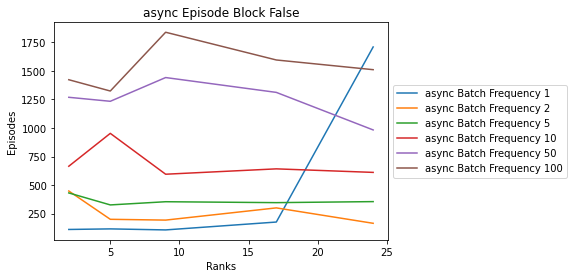

In [5]:
plotType = plt.plot
# plotType = plt.scatter
bs = 32
ts = 1
for w in which:
    if plotType is plt.scatter or (plotType is plt.plot and w != "sync"):
        for ep in [True, False]:
            if w == "async" or not (plotType is plt.scatter and ep):
                for b in batchFrequency:
                    toPlot = select(data, helper(which=w, batch_frequency=b, episode_block=ep, batch_size=bs, train_frequency=ts), sort=["ranks"])
                    plotType(toPlot["ranks"], toPlot["converged"], label=w + " Batch Frequency " + str(b))
                plt.title(w + " Episode Block " + str(ep))
                plt.xlabel("Ranks")
                plt.ylabel("Episodes")
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                plt.show()

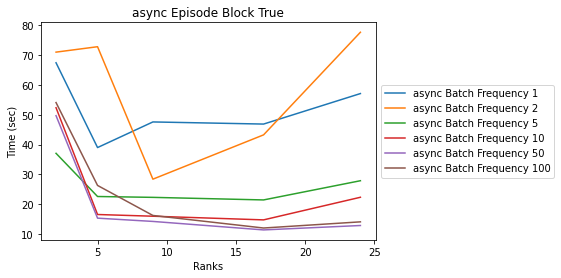

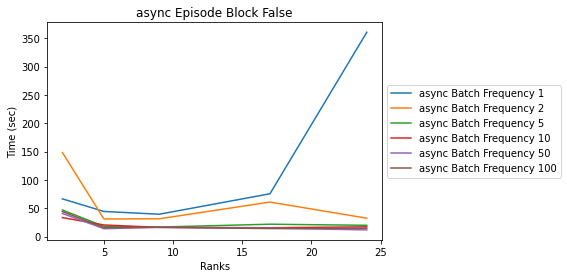

In [6]:
# plotType =  plt.scatter
plotType =  plt.plot
bs = 32
ts = 1
for w in which:
    if plotType is plt.scatter or (plotType is plt.plot and w != "sync"):
        for ep in [True, False]:
            if w == "async" or not (plotType is plt.scatter and ep):
                for b in batchFrequency:
                    toPlot = select(data, helper(which=w, batch_frequency=b, episode_block=ep, batch_size=bs, train_frequency=ts), sort=["ranks"])
                    plotType(toPlot["ranks"], toPlot["time"], label=w + " Batch Frequency " + str(b))
            plt.title(w + " Episode Block " + str(ep))
            plt.xlabel("Ranks")
            plt.ylabel("Time (sec)")
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            plt.show()

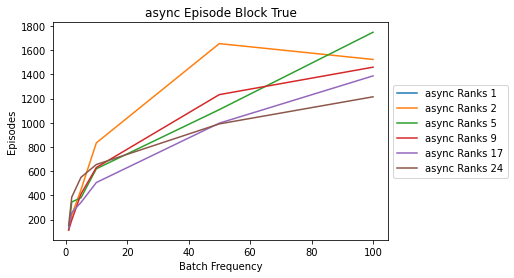

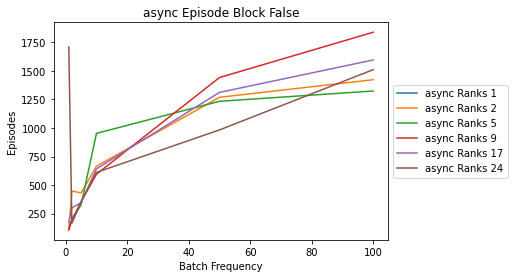

In [7]:
plotType = plt.plot
# plotType = plt.scatter
bs = 32
ts = 1
for w in which:
    if plotType is plt.scatter or (plotType is plt.plot and w != "sync"):
        for ep in [True, False]:
            if w == "async" or not (plotType is plt.scatter and ep):
                for r in ranks:
                    toPlot = select(data, helper(which=w, ranks=r, episode_block=ep, batch_size=bs, train_frequency=ts), sort=["batch_frequency"])
                    plotType(toPlot["batch_frequency"], toPlot["converged"], label=w + " Ranks " + str(r))
                plt.title(w + " Episode Block " + str(ep))
                plt.xlabel("Batch Frequency")
                plt.ylabel("Episodes")
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                plt.show()

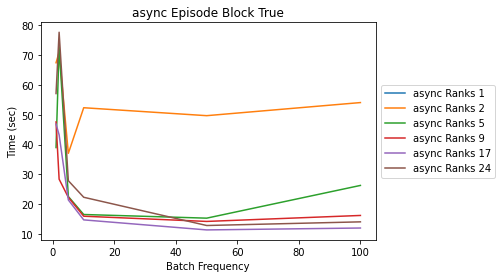

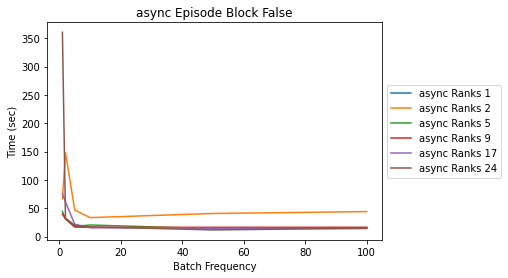

In [8]:
plotType = plt.plot
# plotType = plt.scatter
bs = 32
ts = 1
for w in which:
    if plotType is plt.scatter or (plotType is plt.plot and w != "sync"):
        for ep in [True, False]:
            if w == "async" or not (plotType is plt.scatter and ep):
                for r in ranks:
                    toPlot = select(data, helper(which=w, ranks=r, episode_block=ep, batch_size=bs, train_frequency=ts), sort=["batch_frequency"])
                    plotType(toPlot["batch_frequency"], toPlot["time"], label=w + " Ranks " + str(r))
                plt.title(w + " Episode Block " + str(ep))
                plt.xlabel("Batch Frequency")
                plt.ylabel("Time (sec)")
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                plt.show()

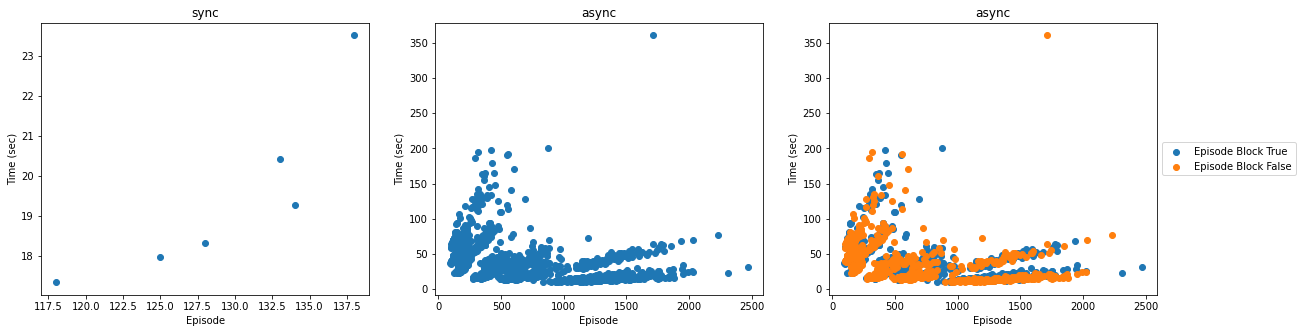

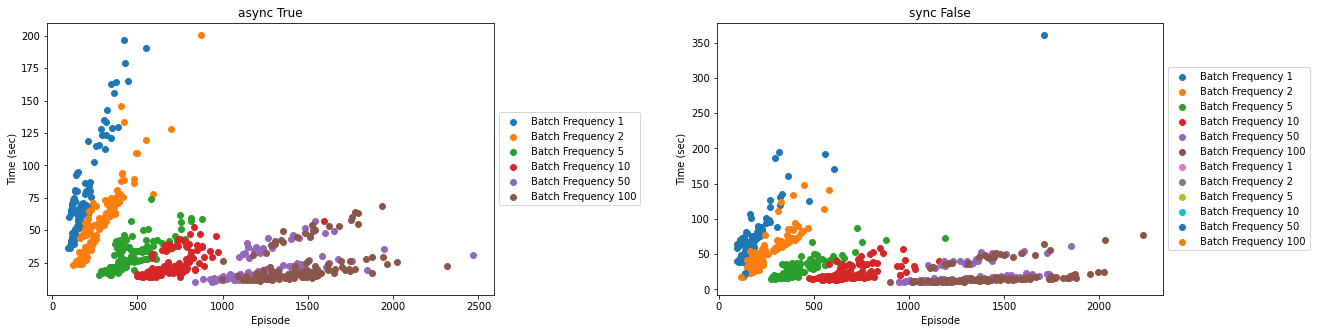

In [9]:

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
# plt.subplots_adjust(hspace=.5, wspace=.75)

toPlot = select(data, helper(which="sync"))
axes[0].scatter(toPlot["converged"], toPlot["time"])
axes[0].set_title("sync")
axes[0].set_xlabel("Episode")
axes[0].set_ylabel("Time (sec)")

toPlot = select(data, helper(which="async"))
axes[1].scatter(toPlot["converged"], toPlot["time"])
axes[1].set_title("async")
axes[1].set_xlabel("Episode")
axes[1].set_ylabel("Time (sec)")

for ep in [True, False]:
    toPlot = select(data, helper(which="async", episode_block=ep))
    axes[2].scatter(toPlot["converged"], toPlot["time"], label="Episode Block " + str(ep))
    axes[2].set_title("async")
    axes[2].set_xlabel("Episode")
    axes[2].set_ylabel("Time (sec)")
    axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
plt.subplots_adjust(wspace=.5)

for w in which:
    for i, ep in enumerate([True, False]):
        if w == "async" or not ep:
            for b in batchFrequency:
                toPlot = select(data, helper(which=w, batch_frequency=b, episode_block=ep))
            # for r in ranks:
            #         toPlot = data[(data["which"] == w) & (data["ranks"] == r) & (data["episode_block"] == ep)]
            # # toPlot = data[(data["which"] == w) & (data["episode_block"] == ep)]
                axes[i].scatter(toPlot["converged"], toPlot["time"], label="Batch Frequency " + str(b))
            axes[i].set_title(w + " " + str(ep))
            axes[i].set_xlabel("Episode")
            axes[i].set_ylabel("Time (sec)")
            axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Batch Frequency async [  1   2   5  10  50 100]


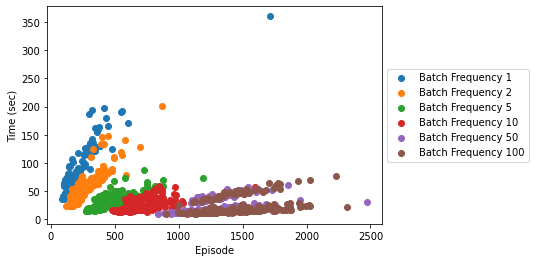

Train Frequency async [  1   2   5  10 100]


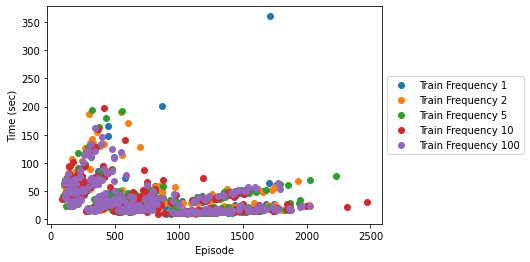

Episode Block async [False  True]


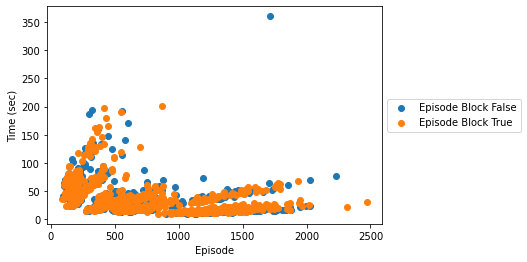

Ranks async [ 1  2  5  9 17 24]


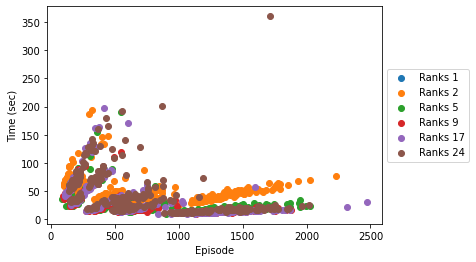

Batch Size async [ 32  73 128 256 512]


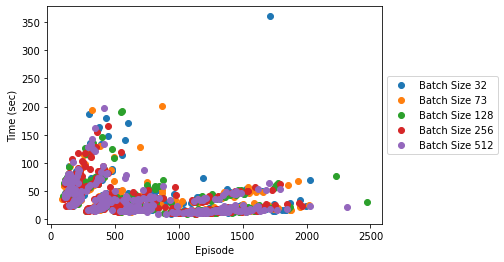

Batch Frequency sync [  1   2   5  10  50 100]


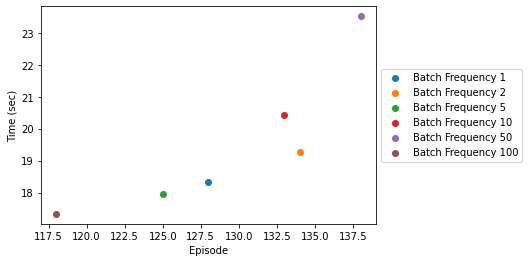

Train Frequency sync [  1   2   5  10 100]


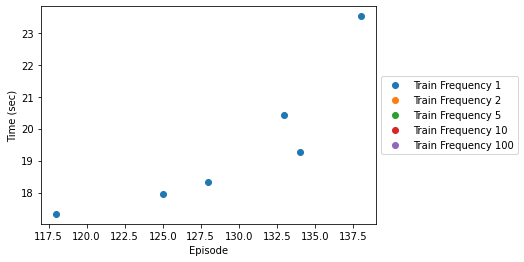

Episode Block sync [False  True]


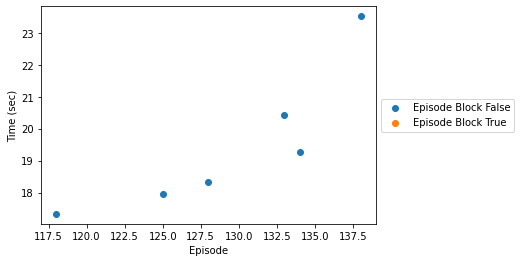

Ranks sync [ 1  2  5  9 17 24]


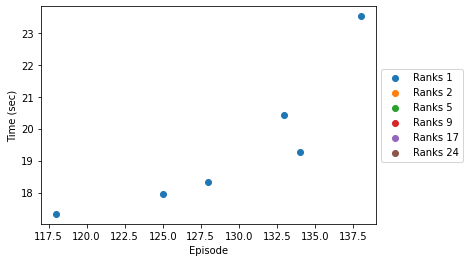

Batch Size sync [ 32  73 128 256 512]


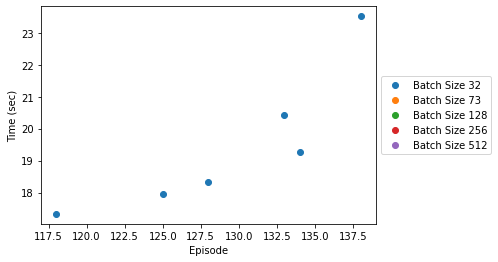

In [10]:
# fig, axes = plt.subplots(1, 2, figsize=(20, 5))
# plt.subplots_adjust(wspace=.5)

lst = [(batchFrequency, lambda w, x: helper(which=w, batch_frequency=x), "Batch Frequency"),
       (trainFrequency, lambda w, x: helper(which=w, train_frequency=x), "Train Frequency"),
       (episodeBlock, lambda w, x: helper(which=w, episode_block=x), "Episode Block"),
       (ranks, lambda w, x: helper(which=w, ranks=x), "Ranks"),
       (batchSize, lambda w, x: helper(which=w, batch_size=x), "Batch Size")]

for w in which:
    for i, j, k in lst:
        print(k, w, i)
        for x in i:
            toPlot = select(data, j(w, x))
            plt.scatter(toPlot["converged"], toPlot["time"], label=k + " " + str(x))
        # plt.title(w + " " + str(ep))
        plt.xlabel("Episode")
        plt.ylabel("Time (sec)")
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

No handles with labels found to put in legend.


Batch Frequency async 1 [  1   2   5  10  50 100]
Batch Frequency async 2 [  1   2   5  10  50 100]
Batch Frequency async 5 [  1   2   5  10  50 100]
Batch Frequency async 9 [  1   2   5  10  50 100]
Batch Frequency async 17 [  1   2   5  10  50 100]
Batch Frequency async 24 [  1   2   5  10  50 100]


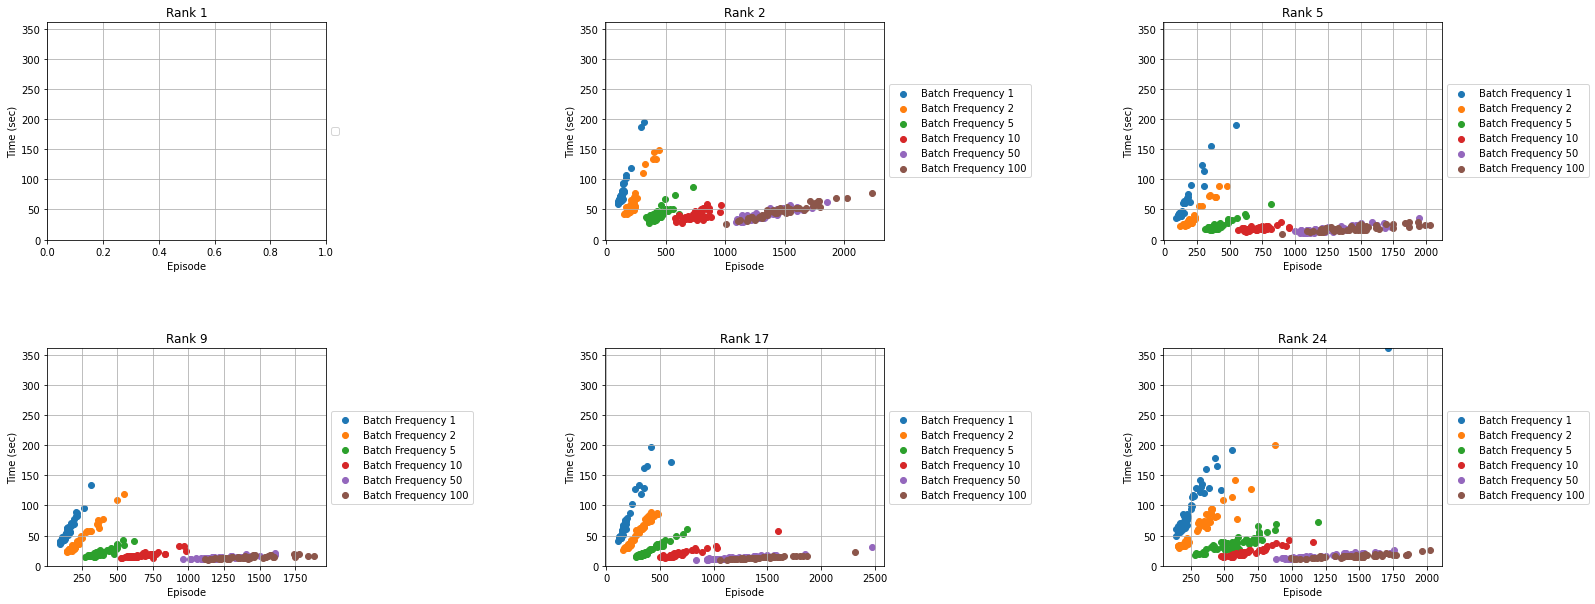

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(25, 10))
axes = [item for sublist in axes for item in sublist]
plt.subplots_adjust(hspace=.5, wspace=1)

minTime = data["time"].min()
maxTime = data["time"].max()

lst = [(batchFrequency, lambda w, r, x: helper(which=w, ranks=r, batch_frequency=x), "Batch Frequency")]
for w in which[:1]:
    for p, r in enumerate(ranks):
        for i, j, k in lst:
            print(k, w, r, i)
            for x in i:
                toPlot = select(data, j(w, r, x))
                if(len(toPlot)):
                    axes[p].scatter(toPlot["converged"], toPlot["time"], label=k + " " + str(x))
            axes[p].set_title("Rank " + str(r))
            axes[p].set_xlabel("Episode")
            axes[p].set_ylabel("Time (sec)")
            axes[p].set_ylim(0, maxTime)
            axes[p].grid()
            axes[p].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

,which,episode_block,batch_frequency,ranks,train_frequency,batch_size,time,converged,alive,average,last,speedup
804,async,True,100,2,100,73,25.818258,1004,1,0.0,101.0,1.000000
88,async,False,100,5,1,512,10.006937,901,4,0.0,101.0,2.580036
116,async,False,100,9,2,256,9.929984,1136,8,0.0,101.0,2.600030
1258,async,True,50,17,10,512,9.609144,837,16,0.0,101.0,2.686843
26,async,False,100,24,100,256,11.101058,1016,23,0.0,101.0,2.325748


,which,episode_block,batch_frequency,ranks,train_frequency,batch_size,time,converged,alive,average,last,speedup
324,async,False,1,2,5,73,194.547873,318,1,0.0,101.0,0.132709
1090,async,True,1,5,2,128,190.790487,550,4,0.0,101.0,0.135323
1103,async,True,1,9,100,512,133.313395,317,8,0.0,101.0,0.193666
1008,async,True,1,17,10,512,197.115135,418,16,0.0,101.0,0.130981
287,async,False,1,24,1,32,360.473270,1710,23,0.0,101.0,0.071623


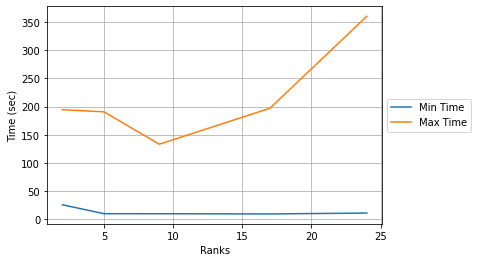

In [12]:
from IPython.display import display

minTime = data["time"].min()
maxTime = data["time"].max()

for w in which[:1]:
    mins = []
    for r in ranks:
        reduced = select(data, helper(which=w, ranks=r))
        minTime = reduced["time"].min()
        mins.append(select(reduced, [("time", minTime)]))
    mins = pd.concat(mins)
    baseline = select(mins, helper(which=w, ranks=2)).iloc[0]["time"]
    mins["speedup"] = baseline/mins["time"]
    display(mins)

for w in which[:1]:
    maxs = []
    for r in ranks:
        reduced = select(data, helper(which=w, ranks=r))
        maxTime = reduced["time"].max()
        maxs.append(select(reduced, [("time", maxTime)]))
    maxs = pd.concat(maxs)
    maxs["speedup"] = baseline/maxs["time"]
    display(maxs)

plt.plot(mins["ranks"], mins["time"], label="Min Time")
plt.plot(maxs["ranks"], maxs["time"], label="Max Time")
plt.grid()
plt.xlabel("Ranks")
plt.ylabel("Time (sec)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

        